In [2]:
import matplotlib.pyplot as plt 
from astropy.io import fits
from matplotlibrc import *

In [3]:
hdul = fits.open('sfh_2000_10_20250818_152758.fits')
hdul.info()

Filename: sfh_2000_10_20250818_152758.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU     12   2000R x 2C   [10D, 4334D]   
  2  WAVELENGTHS    1 ImageHDU         7   (4334,)   float64   


In [4]:
data = hdul[1].data
wav = hdul[2].data

n = 100
spec = data[n][1]
sfh = data[n][0]

[0.256292   0.02287888 0.08475831 0.01812349 0.07738254 0.17745379
 0.06816859 0.06647355 0.17252246 0.05594638]


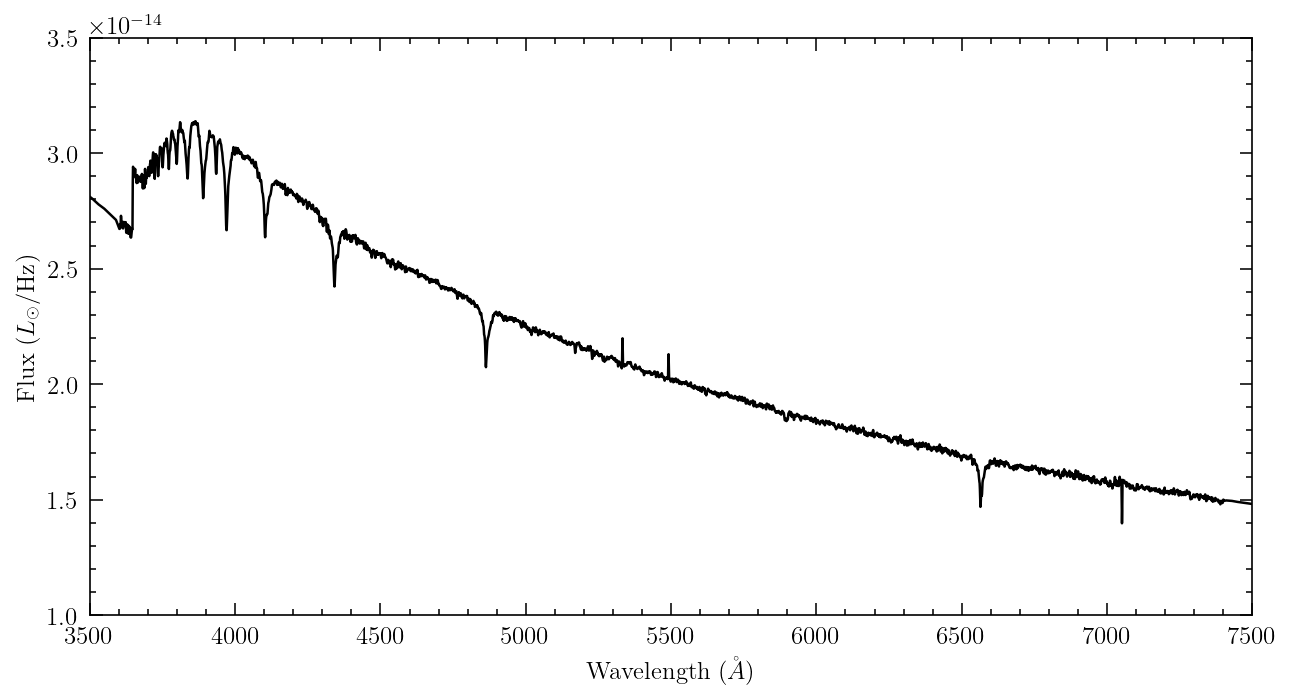

In [8]:
plt.figure(figsize=[10,5])
plt.plot(wav, spec, 'k')
plt.xlim(3500,7500)
plt.ylim(1e-14,3.5e-14)
plt.xlabel('Wavelength ($\\AA$)')
plt.ylabel('Flux ($L_\\odot/\\mathrm{Hz}$)')

# Save the plot as a PDF before showing or printing
import os
os.makedirs('Proposal/figs', exist_ok=True)
plt.savefig('Proposal/figs/sample-spec.pdf', format='pdf')

print(sfh)

In [16]:
import numpy as np
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'same') / w

window_size = 51  # Adjust as needed for smoothing
spec_flat = spec / moving_average(spec, window_size)
spec_flat_centered = spec_flat - np.mean(spec_flat)

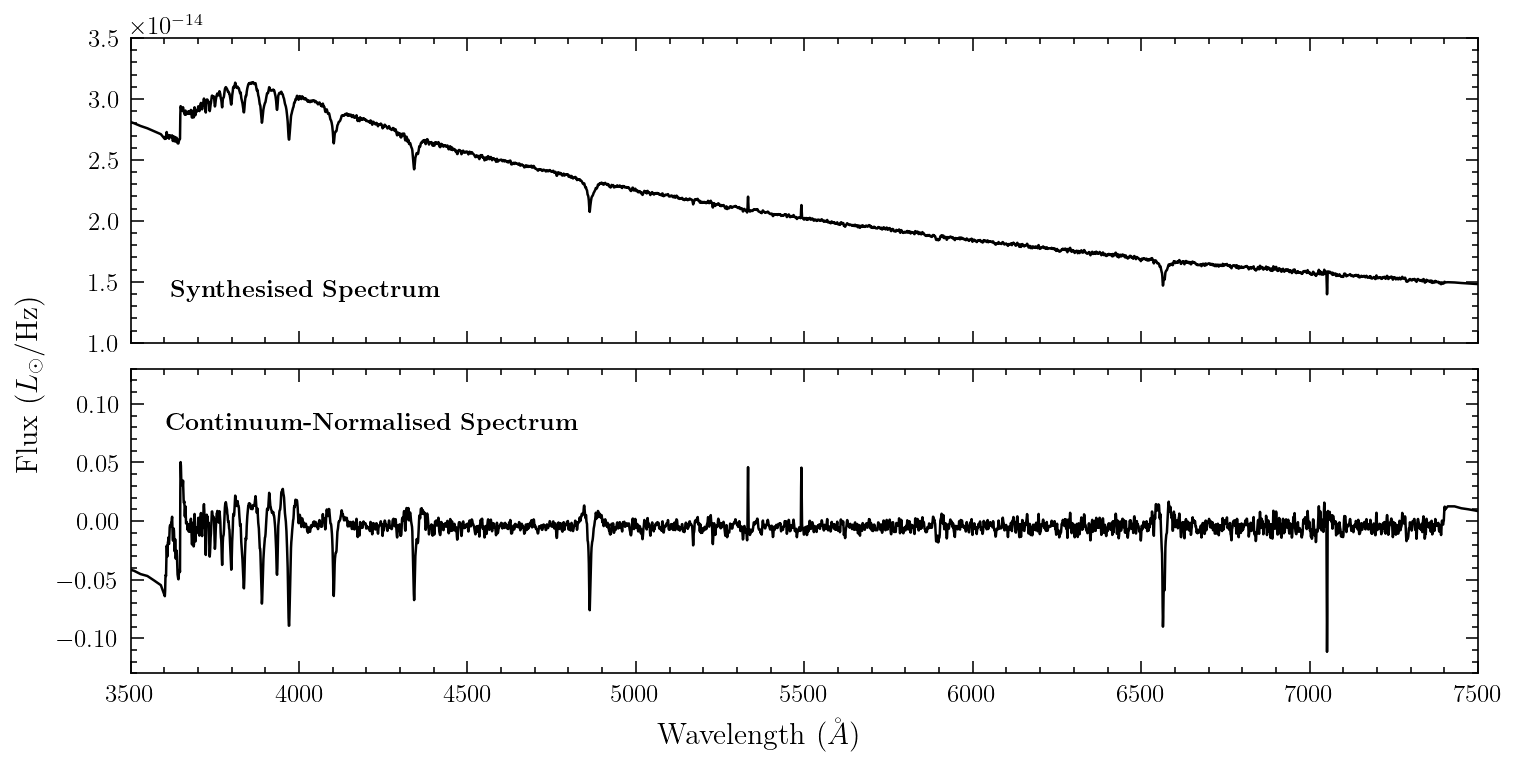

In [46]:
fig, ax = plt.subplots(2,1,figsize=[10,5],sharex=True,constrained_layout=True)

ax[0].plot(wav, spec, 'k')
ax[0].set_xlim(3500,7500)
ax[0].set_ylim(1e-14,3.5e-14)
ax[0].text(0.13, 0.15, "\\textbf{Synthesised Spectrum}", transform=ax[0].transAxes, ha="center")

ax[1].plot(wav, spec_flat_centered, 'k')

ax[1].set_ylim(-0.13,0.13)
ax[1].text(0.18, 0.8, "\\textbf{Continuum-Normalised Spectrum}", transform=ax[1].transAxes, ha="center")

fig.supylabel('Flux ($L_\\odot/\\mathrm{Hz}$)')
fig.supxlabel('Wavelength ($\\AA$)')

import os
os.makedirs('Proposal/figs', exist_ok=True)
plt.savefig('Proposal/figs/sample-spec.pdf', format='pdf')
plt.show()